In [94]:
# Before applying HOG, the following preprocessing steps are typically performed on the image:
import cv2
import matplotlib.pyplot as plt
import numpy as np

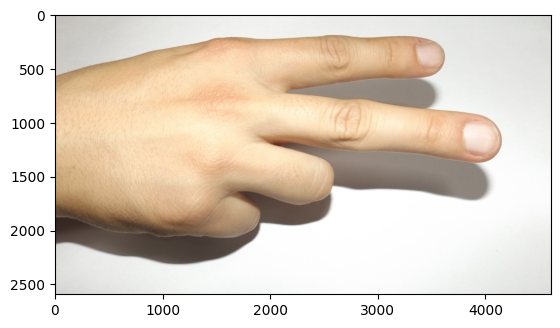

In [95]:
# Read the image
image_path = '2_woman (3).JPG'
img = cv2.imread(image_path)

# convert BGR to RGB color space, because jpg images are in BGR color space and imshow works on image in RGB space
img = img[:, :, ::-1]

# Display the image
plt.imshow(img)

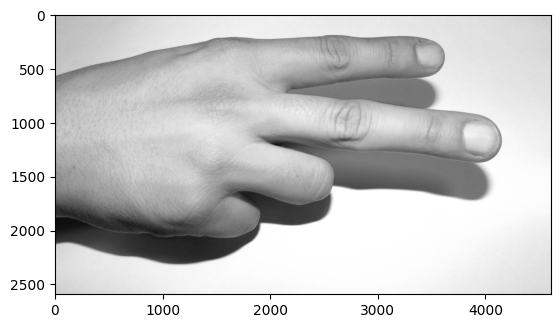

In [96]:
# Convert the image to grayscale: 
# HOG operates on grayscale images, so the input image needs to be converted to grayscale.

grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(grayscale_image, cmap='gray')

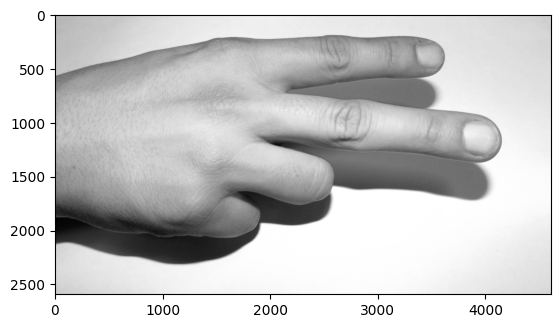

In [97]:
# Noise reduction: 
# If the image is noisy, it may be beneficial to apply a denoising filter, such as a median filter or a Gaussian filter, before computing the HOG descriptor.

# kernel_size (int): The size of the Gaussian filter kernel.
kernel_size = 3  # adjust this value to control the size of the filter kernel

# sigma (float): The standard deviation of the Gaussian filter.
sigma = 1.0  # adjust this value to control the degree of smoothing

filtered_image  = cv2.GaussianBlur(grayscale_image, (kernel_size, kernel_size), sigma)

# Display the image
plt.imshow(filtered_image, cmap='gray')

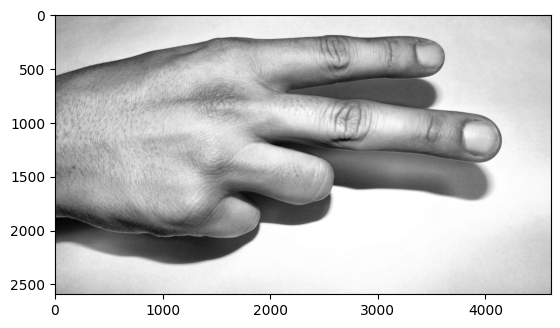

In [98]:
# Apply local contrast normalization:
# This step helps to improve the robustness of the HOG descriptor to lighting variations. Common technique for local contrast normalization is adaptive histogram equalization.

# Apply adaptive histogram equalization to the grayscale image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
normalized_image = clahe.apply(grayscale_image)

# Display the image
plt.imshow(normalized_image, cmap='gray')

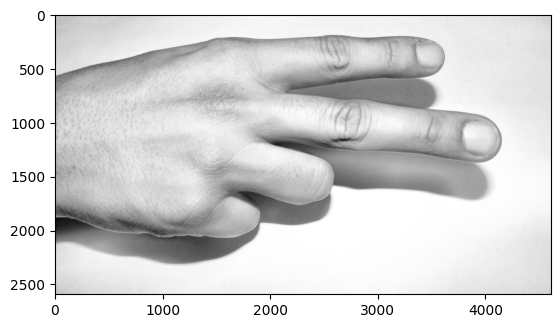

In [99]:
# Gamma correction: 
# Gamma correction can help to improve the contrast and enhance the edges in the image.

gamma_value = 0.5  # adjust this value to control the degree of correction

img_array = np.array(normalized_image, dtype=np.float32) / 255.0  # convert to float and scale to [0, 1]
corrected_array = np.power(img_array, gamma_value)
corrected_image = np.uint8(corrected_array * 255.0)  # convert back to uint8 format

# Display the image
plt.imshow(corrected_image, cmap='gray')

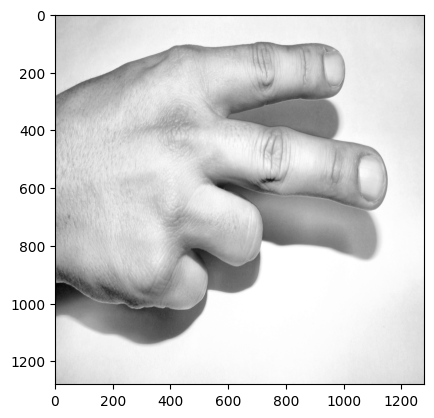

In [100]:
# Resize the image: 
# HOG works best on images that are scaled to a consistent size. Resizing the image can also help to reduce computation time.

size = (128, 128)  # or whatever size you want

# Resizes an image to the specified size.
resized_image = cv2.resize(corrected_image,(1280,1280))

# Display the image
plt.imshow(resized_image, cmap='gray')